In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Tror vindhastighederne er i m/s og 
def dataLoad(filename, Nx, Ny, Nz):
    with open(filename, 'rb') as binary_file:
        data = np.fromfile(binary_file,np.single)
    if np.size(data) == Nx * Ny * Nz:
        data = np.reshape(data,(Nx,Ny,Nz)).T #nu er rækkefølgen omvendt nz, ny, nx
    else:
        print("Invalid data or dimensions")
    return data

In [3]:
data = dataLoad("turbine_32x32x8192.bin",32,32,8192)

In [4]:
np.shape(data)

(8192, 32, 32)

In [5]:
np.min(data), np.max(data)

(-27.719328, 27.752756)

In [6]:
def dataStatistics(data, statistic, yref=0, zref=0, dx=0):
    if statistic == "mean":
        result = np.mean(data, axis=2) # axis 2 svarende til x
    if statistic == "variance":
        result = np.var(data, axis=2) 
    if statistic == "cross-correlation":
        nx = np.size(data,axis=2) 
        stat_data = data[:,:, 1:nx-dx] * data[zref,yref,dx:nx]
        np.correlate([data])
    return result

In [7]:
np.shape(np.mean(data, axis=2))

(8192, 32)

In [8]:
data = np.absolute(data)

In [9]:
np.size(dataStatistics(data, "mean"))

262144

In [10]:
np.min(data[:,:,])

1.525734e-07

In [11]:
data[:,:,:]

array([[[4.11133289e+00, 1.94157648e+00, 5.26946640e+00, ...,
         1.05420195e-01, 8.14450932e+00, 3.92383718e+00],
        [3.98767734e+00, 2.06003499e+00, 7.41018295e+00, ...,
         2.52458072e+00, 9.16442108e+00, 6.97977924e+00],
        [4.05922842e+00, 1.23663247e+00, 1.11519747e+01, ...,
         1.81941962e+00, 8.86223793e+00, 7.53221655e+00],
        ...,
        [4.91012049e+00, 9.14855194e+00, 3.31142235e+00, ...,
         6.52496004e+00, 7.94989109e+00, 8.52123928e+00],
        [2.70759058e+00, 4.14350510e+00, 4.80350780e+00, ...,
         8.97039795e+00, 6.79938889e+00, 6.81769323e+00],
        [5.68578529e+00, 2.71816325e+00, 2.71760011e+00, ...,
         7.57528162e+00, 5.32392979e+00, 4.15400791e+00]],

       [[4.30695820e+00, 2.94915605e+00, 7.58396626e+00, ...,
         2.40144300e+00, 1.05558243e+01, 2.96290445e+00],
        [2.48808479e+00, 2.24709868e-01, 5.12450886e+00, ...,
         5.20971727e+00, 6.81943941e+00, 6.80174255e+00],
        [2.78929806e+00, 

In [ ]:
from scipy.signal import correlate

In [12]:
dataStatistics(data, "mean")[500]

array([5.417339 , 4.730823 , 4.9234242, 4.754093 , 4.477807 , 4.868981 ,
       4.592671 , 4.1126065, 4.6807456, 4.631213 , 4.9733915, 4.40028  ,
       4.381163 , 5.086288 , 5.3191075, 4.589457 , 4.8727984, 5.106613 ,
       4.6370564, 4.7973886, 4.783248 , 4.84885  , 4.7382154, 5.118324 ,
       4.5689163, 4.053518 , 4.364376 , 4.2179503, 4.4886065, 4.958992 ,
       4.8625255, 4.3696246], dtype=float32)

In [34]:
from dataStatistics import *

In [39]:
dataStatistics(data, "cross-correlation", yref=4, zref=4, dx=3)

ValueError: operands could not be broadcast together with shapes (8192,32,28) (29,) 

In [13]:
np.min(data[0])

0.0019539609

In [ ]:
correlate()

In [15]:
Zref = np.random.uniform(low=-15, high=18, size=8192)

In [31]:
np.mean(data.T, axis=0)

array([[5.044406 , 5.123379 , 5.0984793, ..., 5.324692 , 5.3664374,
        5.399841 ],
       [4.9358697, 4.93841  , 4.3578377, ..., 5.3173933, 5.9297023,
        5.7608337],
       [4.691531 , 4.3271194, 4.215962 , ..., 5.4267282, 6.0341215,
        5.1134305],
       ...,
       [5.2576613, 4.6287727, 4.525262 , ..., 4.604704 , 4.3427267,
        5.1969414],
       [5.1784964, 5.7554226, 5.1667585, ..., 4.8620887, 4.4986715,
        4.0914464],
       [5.124216 , 4.9913464, 5.4175386, ..., 5.295064 , 5.033225 ,
        5.0483327]], dtype=float32)

In [33]:
np.mean(data, axis=2).T

array([[5.044406 , 5.123379 , 5.0984793, ..., 5.324692 , 5.3664374,
        5.399841 ],
       [4.9358697, 4.93841  , 4.3578377, ..., 5.3173933, 5.9297023,
        5.7608337],
       [4.691531 , 4.3271194, 4.215962 , ..., 5.4267282, 6.0341215,
        5.1134305],
       ...,
       [5.2576613, 4.6287727, 4.525262 , ..., 4.604704 , 4.3427267,
        5.1969414],
       [5.1784964, 5.7554226, 5.1667585, ..., 4.8620887, 4.4986715,
        4.0914464],
       [5.124216 , 4.9913464, 5.4175386, ..., 5.295064 , 5.033225 ,
        5.0483327]], dtype=float32)

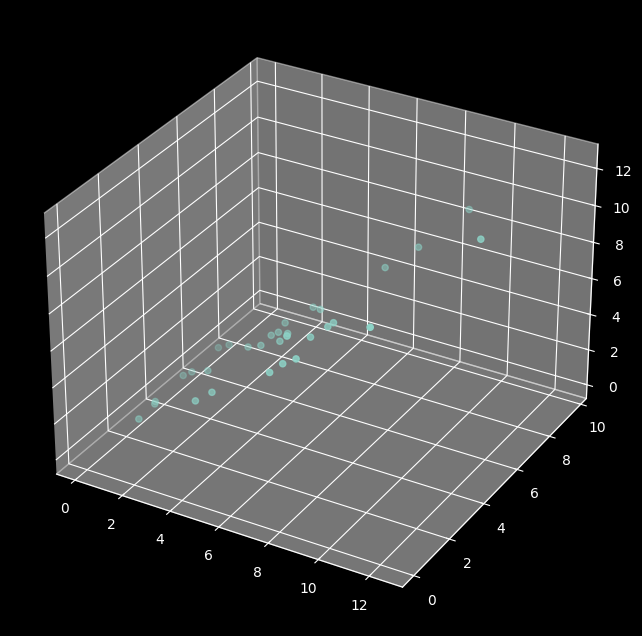

In [18]:
%matplotlib inline
plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d")
#ax.scatter(3,5,3)
fg = ax.scatter3D(data[0,0,:], data[0,:,0], data[0,0,:])

In [19]:
data[0,:,0]

array([4.111333  , 3.9876773 , 4.0592284 , 6.581118  , 4.805943  ,
       4.7065616 , 9.668024  , 7.6327014 , 4.8473125 , 6.064512  ,
       4.769979  , 3.7540333 , 0.8767855 , 1.7099332 , 5.294008  ,
       0.7359729 , 2.2021823 , 2.762669  , 3.0650249 , 6.2713466 ,
       4.8527846 , 6.9442887 , 3.491015  , 2.5219696 , 0.10508028,
       0.08365636, 3.7736366 , 0.44686902, 0.2983302 , 4.9101205 ,
       2.7075906 , 5.6857853 ], dtype=float32)

In [20]:
np.size(data[1,:,:])

1024

In [21]:
np.min(data)

1.525734e-07

In [22]:
data[0]

array([[ 4.111333  ,  1.9415765 ,  5.2694664 , ...,  0.10542019,
         8.144509  ,  3.9238372 ],
       [ 3.9876773 ,  2.060035  ,  7.410183  , ...,  2.5245807 ,
         9.164421  ,  6.9797792 ],
       [ 4.0592284 ,  1.2366325 , 11.151975  , ...,  1.8194196 ,
         8.862238  ,  7.5322165 ],
       ...,
       [ 4.9101205 ,  9.148552  ,  3.3114223 , ...,  6.52496   ,
         7.949891  ,  8.521239  ],
       [ 2.7075906 ,  4.143505  ,  4.803508  , ...,  8.970398  ,
         6.799389  ,  6.817693  ],
       [ 5.6857853 ,  2.7181633 ,  2.7176    , ...,  7.5752816 ,
         5.32393   ,  4.154008  ]], dtype=float32)

In [23]:
dataStatistics(data, "mean")

array([[5.044406 , 4.9358697, 4.691531 , ..., 5.2576613, 5.1784964,
        5.124216 ],
       [5.123379 , 4.93841  , 4.3271194, ..., 4.6287727, 5.7554226,
        4.9913464],
       [5.0984793, 4.3578377, 4.215962 , ..., 4.525262 , 5.1667585,
        5.4175386],
       ...,
       [5.324692 , 5.3173933, 5.4267282, ..., 4.604704 , 4.8620887,
        5.295064 ],
       [5.3664374, 5.9297023, 6.0341215, ..., 4.3427267, 4.4986715,
        5.033225 ],
       [5.399841 , 5.7608337, 5.1134305, ..., 5.1969414, 4.0914464,
        5.0483327]], dtype=float32)

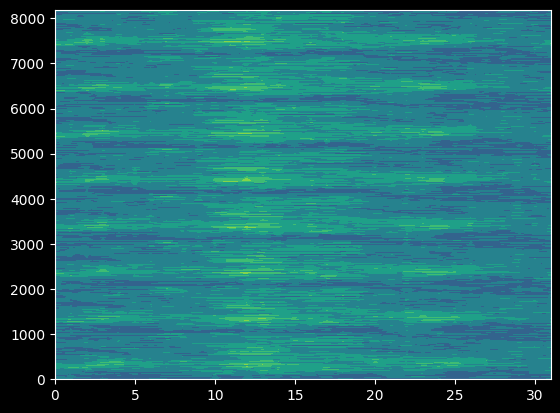

In [48]:
#plotting
data_plot = dataStatistics(data, "variance")
#data_plot = data[12,:,:] 
z = np.arange(np.size(data_plot[1,:]))
y = np.arange(np.size(data_plot[:,1]))
z,y = np.meshgrid(z,y)
plt.contourf(z,y,data_plot)

In [43]:
np.shape(data_plot)

(8192, 32)

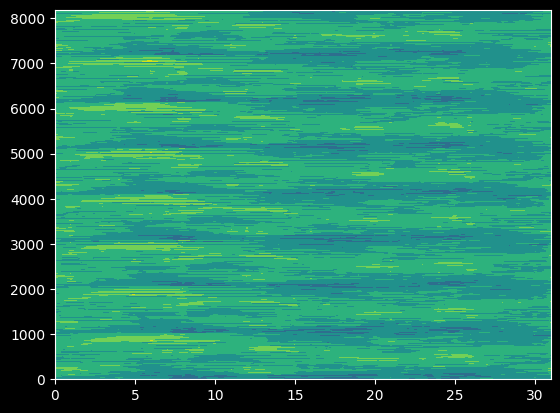

In [57]:
plt.contourf(data_mean)

In [56]:
data_mean = np.mean(data, axis=2)

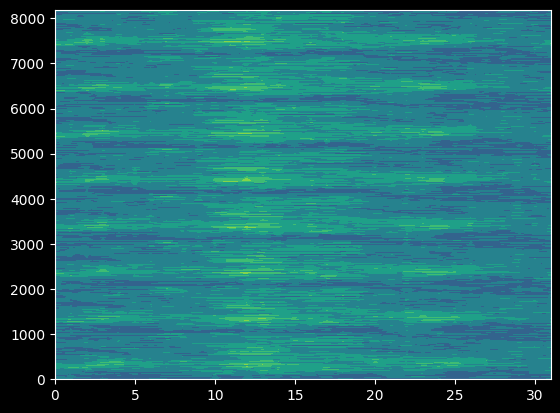

In [49]:
#plotting
data_plot = dataStatistics(data, "variance")
#data_plot = data[12,:,:] 
z = np.arange(np.size(data_plot[1,:]))
y = np.arange(np.size(data_plot[:,1]))
z,y = np.meshgrid(z,y)
plt.contourf(z,y,data_plot)

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def dataPlot(data, stat):
    ax = plt.subplot()
    #plotting
    data_plot = dataStatistics(data, statistic=stat)
    #data_plot = data[12,:,:] 
    z = np.arange(np.size(data_plot[1,:]))
    y = np.arange(np.size(data_plot[:,1]))
    z,y = np.meshgrid(z,y)
    im = plt.contour(z,y,data_plot)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    mappable = plt.cm.ScalarMappable()
    plt.colorbar(mappable,cax)

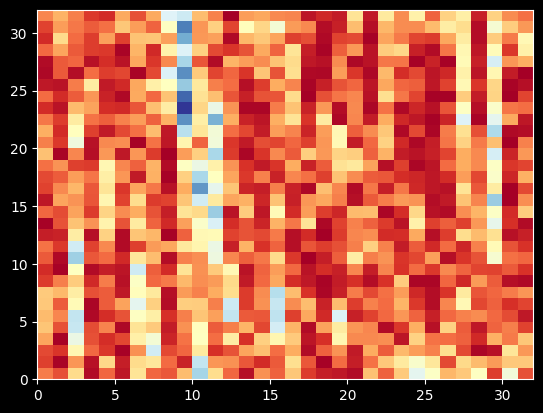

In [26]:
plt.pcolormesh(data[1,:,:], cmap='RdYlBu')

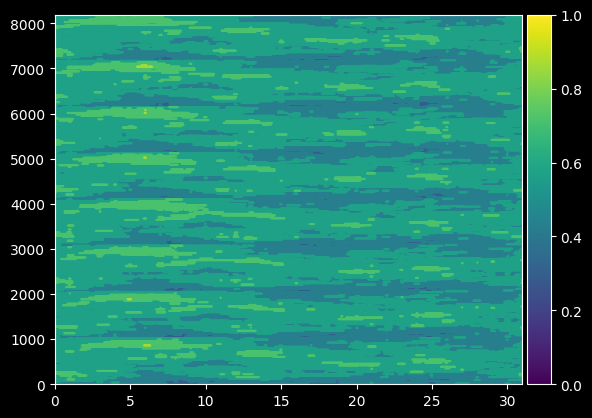

In [58]:
dataPlot(data, "mean")

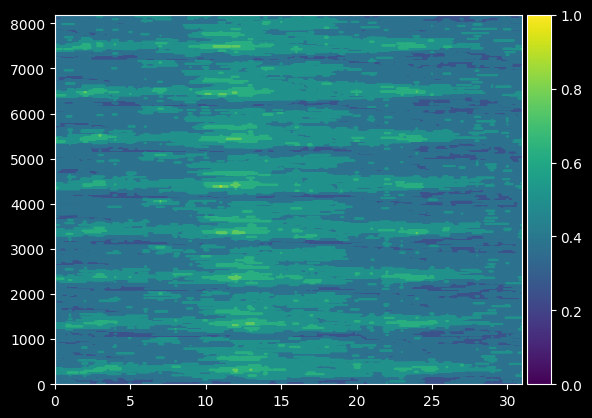

In [28]:
dataPlot(data, "variance")